<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/ProyectoFinal/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import ndimage
import pandas as pd

import glob
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carga de datos

In [41]:
lenguaje=['train','test','valid']
#lenguaje=['test','valid']
name = np.array([])
labels = np.array([])
num_px=128
imagenes=[]


In [77]:
dic={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'I':9,'J':10,'K':11,'L':12,'M':13,'N':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26,}

In [42]:
for l in lenguaje:
  files = glob.glob(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/{l}*')
  etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/{l}/_annotations.csv')
  name = np.append(name,np.array(etiquetas['filename']))
  labels = np.append(labels,np.array( etiquetas['class']))
  for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/{l}/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    #data=np.reshape(np.asarray(img),num_px*num_px,order='c')
    data=np.asarray(img)
    data=np.reshape(np.asarray(img),num_px*num_px,order='c')
    imagenes.append(data)
  #print(np.array(etiquetas['filename'][1]))

In [ ]:
for i in range(len(labels)):
  labels[i]=dic[labels[i]]

In [44]:
len(imagenes)

2640

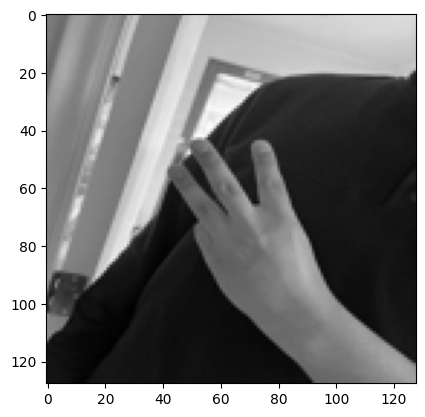

In [46]:
img=Image.open('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/'+name[2310])
img=img.resize((num_px,num_px))
img = img.convert('L')
data=np.asarray(img)
data=np.reshape(np.asarray(img),num_px*num_px,order='c')
plt.imshow(data.reshape(128,128),cmap='gray')
#plt.imshow(data,cmap='gray')

In [85]:
dic[14]

KeyError: ignored

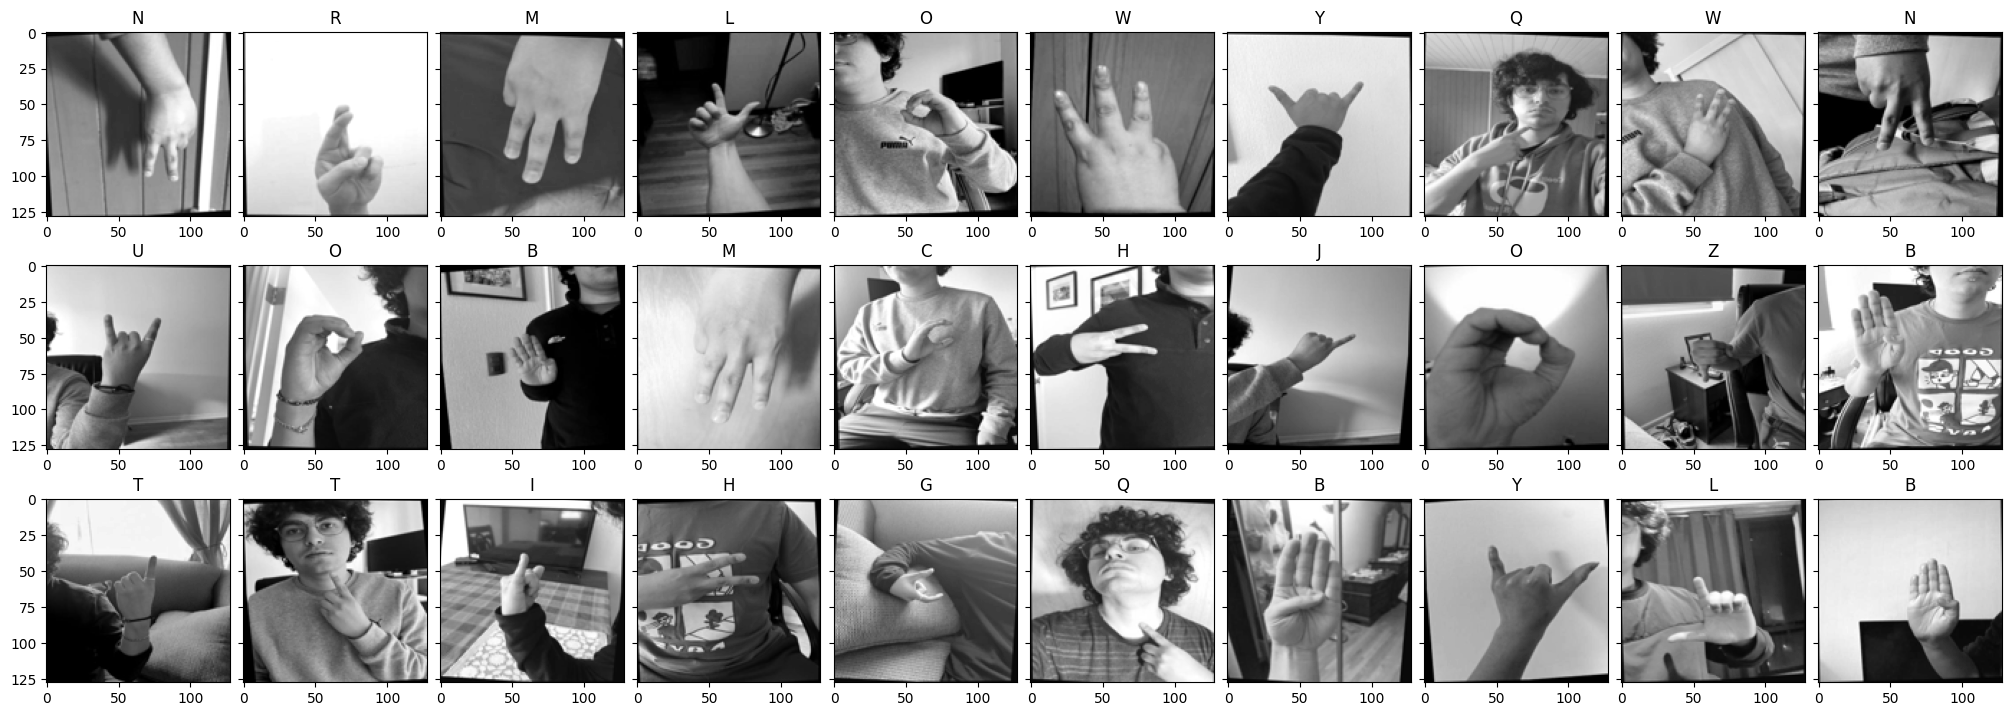

In [47]:
nrows_ = 3
ncols_ = 10
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(20, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.imshow(imagenes[i].reshape(128,128),cmap='gray')
  ax.set_title(dic[labels[i]])

#Preparar datos

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(imagenes,labels, test_size=0.20, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Realizando un modelo (red neuronal)

In [74]:
x_train.shape

(2112, 16384)

##primera aproximacion

In [58]:
# Reformatear los conjuntos de datos de entrenamiento y prueba
x_train = np.stack(x_train)
x_test = np.stack(x_test)

# Asegurar que las imágenes estén en escala de grises (shape: (num_images, num_px, num_px))
x_train = x_train.reshape(-1, num_px, num_px, 1)
x_test = x_test.reshape(-1, num_px, num_px, 1)

# Normalizar los datos de entrada al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [71]:
x_train.shape

(2112, 128, 128, 1)

In [75]:
model = Sequential(
    [
        tf.keras.Input(shape=(x_train.shape[1],)),
        Dense(10, activation='relu', name = 'layer1'),
        Dense(27, activation='softmax', name = 'layer2')
     ]
)
model.compile(optimizer='adam', loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                163850    
                                                                 
 layer2 (Dense)              (None, 27)                297       
                                                                 
Total params: 164147 (641.20 KB)
Trainable params: 164147 (641.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5


UnimplementedError: ignored

In [70]:
model = Sequential()
model.add(Dense(3, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(27, activation='softmax'))

model.compile(optimizer='sgd', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5


ValueError: ignored

In [ ]:
lost, acc = model.evaluate(x_test, y_test)
print(lost, acc)